# Additional analysis for project

---

## Imports

#### Python libraries

In [1]:
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

import sys

#### Ancillary modules

In [2]:
sys.path.append("../")

In [3]:
%load_ext autoreload
%autoreload 2

from utils.functions import (
    json_dump_dict,
    adding_cluster_feature,
    cluster_dictionary,
    finding_clusters_match,
    clustering_dataframes,
    display_confusion_matrix
)

from utils.parameters import (
    gm_rename,
    yr,
    original_features
)

#### Data

In [4]:
df_ime_cmp = pd.read_csv("../base.csv")
df_ime_cmp["GM"] = df_ime_cmp["GM"].map(gm_rename)
df_ime = df_ime_cmp.loc[df_ime_cmp["A.O"] == yr, :].copy()
df_ime

,Unnamed: 0,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
128,129,1,Aguascalientes,1184996,3.27,14.75,1.06,0.62,0.99,30.33,1.76,25.16,33.65,-0.91,1_bajo,28,2010
129,130,2,Baja California,3155070,2.60,12.99,0.43,0.95,3.56,29.06,3.40,10.35,21.87,-1.14,0_muy_bajo,30,2010
130,131,3,Baja California Sur,637026,3.23,14.27,0.94,2.84,7.09,31.74,5.81,15.62,23.30,-0.68,1_bajo,23,2010
131,132,4,Campeche,822441,8.37,22.54,6.42,2.59,9.74,45.97,4.50,30.88,45.51,0.43,3_alto,10,2010
132,133,5,Coahuila de Zaragoza,2748391,2.65,12.17,1.09,0.54,1.39,30.27,1.42,12.15,30.04,-1.14,0_muy_bajo,29,2010
133,134,6,Colima,650555,5.16,18.48,0.69,0.59,1.17,31.32,4.69,14.48,32.04,-0.78,1_bajo,26,2010
134,135,7,Chiapas,4796580,17.91,37.13,5.06,3.82,22.37,53.90,15.66,57.86,69.85,2.32,4_muy_alto,2,2010
135,136,8,Chihuahua,3406465,3.70,16.07,2.64,3.78,4.95,28.39,3.55,17.05,35.93,-0.52,1_bajo,21,2010
136,137,9,Distrito Federal,8851080,2.11,8.72,0.08,0.08,1.79,26.08,1.08,0.67,28.51,-1.48,0_muy_bajo,32,2010
137,138,10,Durango,1632934,3.84,18.76,5.85,4.19,5.73,32.60,7.01,36.19,40.61,0.05,2_medio,15,2010


---

## Clustering exercise

### Clustering algorithm

In [5]:
df_ime = adding_cluster_feature(df_ime)

Features fed for clustering analysis (8):
1. ANALF
2. SPRIM
3. OVSDE
4. OVSEE
5. OVSAE
6. VHAC
7. OVPT
8. PL.5000


In [6]:
gm_dict, c_dict, df_ime = cluster_dictionary(df_ime)

In [7]:
gm_df, c_df = clustering_dataframes(gm_dict, c_dict)

### Results analysis

#### Dataframe comparison

In [8]:
gm_df

0_muy_bajo               1_bajo       2_medio  \
2010 0       Baja California       Aguascalientes       Durango   
     1  Coahuila de Zaragoza  Baja California Sur    Guanajuato   
     2      Distrito Federal               Colima       Morelos   
     3            Nuevo León            Chihuahua       Nayarit   
     4                     -              Jalisco     Querétaro   
     5                     -               México  Quintana Roo   
     6                     -               Sonora       Sinaloa   
     7                     -           Tamaulipas      Tlaxcala   
     8                     -                    -     Zacatecas   

                                 3_alto 4_muy_alto  
2010 0                         Campeche    Chiapas  
     1                          Hidalgo   Guerrero  
     2              Michoacán de Ocampo     Oaxaca  
     3                           Puebla          -  
     4                  San Luis Potosí          -  
     5                          Tabasco          -  
     6  Veracruz de Ignacio de la Llave          -  
     7                          Yucatán          -  
     8                                -          -

In [9]:
c_df

0_muy_bajo               1_bajo     2_medio  \
2010 0                Baja California       Aguascalientes    Campeche   
     1           Coahuila de Zaragoza  Baja California Sur     Durango   
     2               Distrito Federal               Colima  Guanajuato   
     3                     Nuevo León            Chihuahua     Nayarit   
     4                              -              Jalisco   Querétaro   
     5                              -               México     Sinaloa   
     6                              -              Morelos    Tlaxcala   
     7                              -         Quintana Roo     Yucatán   
     8                              -               Sonora           -   
     9                              -           Tamaulipas           -   
     ----------            ----------           ----------  ----------   
     Correct                        4                    8           6   
     Incorrect                      0                    2           2   
     Missing                        0                    0           3   

                                          3_alto  4_muy_alto  
2010 0                                   Hidalgo     Chiapas  
     1                       Michoacán de Ocampo    Guerrero  
     2                                    Puebla      Oaxaca  
     3                           San Luis Potosí           -  
     4                                   Tabasco           -  
     5           Veracruz de Ignacio de la Llave           -  
     6                                 Zacatecas           -  
     7                                         -           -  
     8                                         -           -  
     9                                         -           -  
     ----------                       ----------  ----------  
     Correct                                   6           3  
     Incorrect                                 1           0  
     Missing                                   2           0

#### Confusion matrix

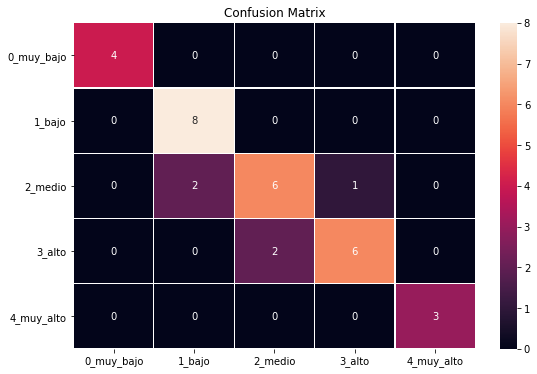

In [10]:
display_confusion_matrix(df_ime)

---

## *Notes*

- Sources
    - [An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)

---

### Creating features dicts

---
---